In [1]:
# importing main libraries and loading data sets 

import pandas as pd
import numpy as np

df = pd.read_csv('Bike-Sharing-Dataset/hour.csv')
df1 = pd.read_csv('Bike-Sharing-Dataset/day.csv')

In [2]:
# having look at the data sets and its properties

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# making the unit test for the data frames
# (we will work mainly with an hourly data set as it contains all necessary information)

import unittest


class TestPassed(unittest.TestCase):
    
    # 0 or 1 test for binary features
    
    def test_feature_binary(self):
        for feature in [df.holiday, df.workingday, df.yr]:
            with self.subTest(i=feature): 
                for grade in feature:            
                    self.assertEqual(grade == 0 or grade == 1, True) 
    
    # test for features with discrete values in respective ranges
    
    def test_feature_discrete(self):
        feats = [df.hr, df.weekday, df.mnth, df.season, df.weathersit]
        lims = [range(24), range(7), range(1,13), range(1,6), range(1,5)]
        for feat, lim in zip(feats,lims):
            with self.subTest(i=feat, j=lim):
                for grade in feat:
                    self.assertEqual(grade in lim, True)
                    
    # checking casual + registered = cnt
                    
    def test_correct_sum(self):
        for i in range(df.shape[0]):
            self.assertEqual(df.casual[i] + df.registered[i], df.cnt[i])
            
    # checking features that must have only unique values
            
    def test_unique(self):
        for feature in [df.instant, df1.instant, df1.dteday]:
            with self.subTest(i=feature): 
                self.assertEqual(len(set(feature)), len(feature))
                
    def test_unique_1(self):
        self.assertEqual(len(df.groupby(['dteday','hr']).size()), df.shape[0])
        
    # checking ranges for non-discrete features
                
    def test_limits(self):
        feats = [df.temp, df.atemp, df.hum]
        lims = [[-8,39], [-16,50], [0, 1]]
        for feat, lim in zip(feats,lims):
            with self.subTest(i=feat, j=lim): 
                for grade in feat:             
                    self.assertTrue(lim[0] <= grade <= lim[1])
                    
    # integer type test
                    
    def test_assert_is_instance(self):
        for feature in [df.instant, df.casual, df.registered, df.cnt]:
            with self.subTest(i=feature): 
                for j in range(len(feature)):                
                    self.assertIsInstance(feature[j], np.int64)
                    
    # test for non-negative feature values
                    
    def test_assert_more_or_equal_than_zero(self):
        for feature in [df.windspeed, df.casual, df.registered, df.cnt]:
            with self.subTest(i=feature): 
                for grade in feature:            
                    self.assertGreaterEqual(grade, 0) 
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_assert_is_instance (__main__.TestPassed) ... ok
test_assert_more_or_equal_than_zero (__main__.TestPassed) ... ok
test_correct_sum (__main__.TestPassed) ... ok
test_feature_binary (__main__.TestPassed) ... ok
test_feature_discrete (__main__.TestPassed) ... ok
test_limits (__main__.TestPassed) ... ok
test_unique (__main__.TestPassed) ... ok
test_unique_1 (__main__.TestPassed) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.313s

OK


In [6]:
# creating important feature - number of days from the introduction of the service to the current date

df.dteday = df.dteday.apply(pd.to_datetime) 

new_col = (df.dteday - df.dteday[0]).dt.days
df.insert(loc=df.shape[1]-1, column='no_day', value=new_col)

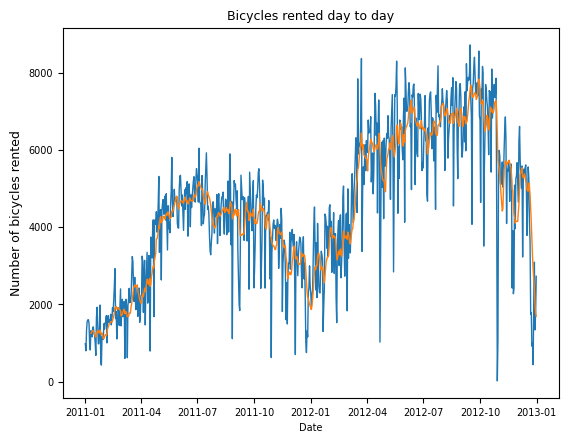

<Figure size 640x480 with 0 Axes>

In [7]:
# Analyzing and plotting some dependecies

# plotting daily usage of bicycles

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

date_form = DateFormatter("%m")
plt.title('Bicycles rented day to day', fontsize=9)
plt.xlabel('Date', fontsize=7)
plt.ylabel('Number of bicycles rented', fontsize=9)
plt.tick_params(labelsize=7)

df1.dteday = pd.to_datetime(df1['dteday'], format='%Y-%m')

plt.plot(df1.dteday, df1.cnt, linewidth=1)
plt.plot(df1.dteday, df1.cnt.rolling(10).mean(), linewidth=1)
plt.show()
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')

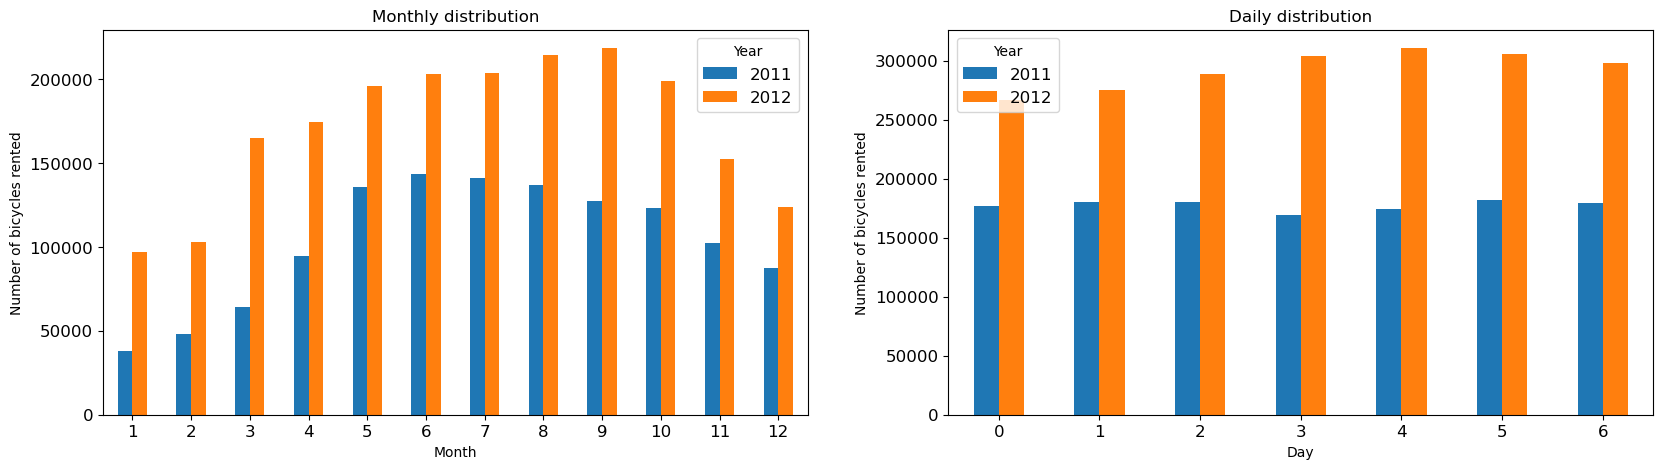

In [8]:
# plotting monthly an daily distribution of bicycle usage

fig, (ax1, ax2) = plt.subplots(1,2)
dfg1 = df.groupby(['mnth','yr'])['cnt'].sum().unstack('yr')
dfg2 = df.groupby(['weekday','yr'])['cnt'].sum().unstack('yr')

dfg1.plot(kind='bar', title='Monthly distribution', xlabel='Month', ylabel='Number of bicycles rented',
         figsize = (20,5), ax=ax1, rot=0, fontsize=12)
ax1.legend(['2011', '2012'], title='Year', fontsize=12);

dfg2.plot(kind='bar', title='Daily distribution', xlabel='Day', ylabel='Number of bicycles rented',
         figsize = (20,5), ax=ax2, rot=0, fontsize=12)
ax2.legend(['2011', '2012'], title='Year', fontsize=12, loc='upper left');

/var/folders/qx/bdlxtnn15xg42mxf3d1962000000gn/T/ipykernel_49678/407664588.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='polar')


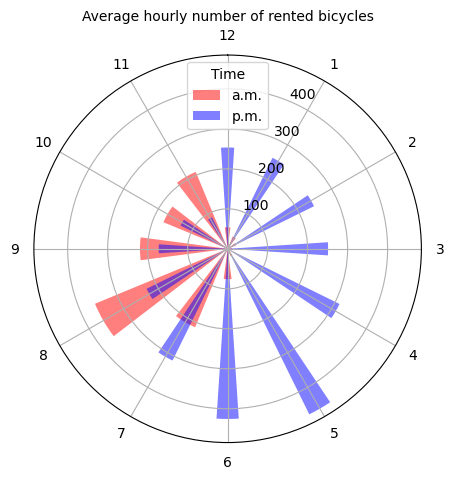

In [9]:
# clock-like plot of hourly usage of bicycles

hours = df.hr.nunique()
theta = np.linspace(0.0, 2*np.pi, hours//2, endpoint=False)
radii = df.groupby(['hr'])['cnt'].mean()
base_width = 2*np.pi /hours 
width = base_width

plt.figure(figsize=(5,10))
plt.axis('off')
ax = plt.subplot(projection='polar')
plt.title('Average hourly number of rented bicycles', fontsize=10)

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.bar(theta, radii[df.hr < 12], bottom=0.0, width=width, color='r', alpha=0.5)
ax.bar(theta, radii[df.hr >= 12], bottom=0.0, width=width/2, color='b', alpha=0.5)
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))

ax.set_xticklabels([12, *range(1, 12)])
ax.legend(['a.m.', 'p.m.'], title='Time', loc='upper center');

plt.show()

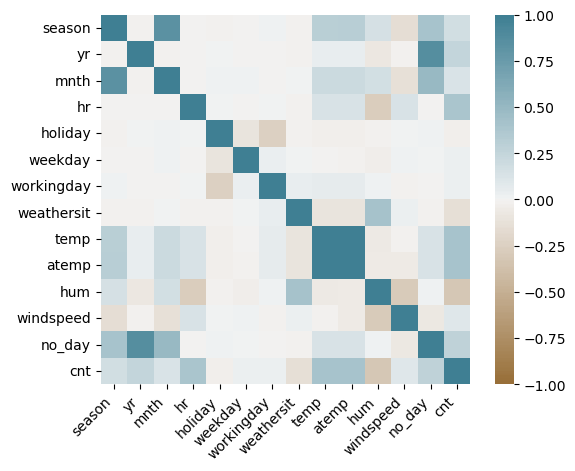

In [10]:
# heat map of correlations between the features

import seaborn as sns

df = df.drop(columns=['dteday', 'casual', 'registered','instant'], axis=1)

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
#importing scikit-learn packages

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier

In [12]:
# extracting predictor and target variables, encoding categorical features

y = df['cnt']
X = df.drop(columns=['cnt'], axis=1)

In [13]:
# setting up a gradient boosting regressor model and making a k-fold evaluation

my_model_1 = XGBRegressor(random_state=2, max_depth=3, n_estimators=100, learning_rate=0.3, objective='count:poisson') 

kfold = KFold(n_splits=10)
results_1 = cross_val_score(my_model_1, X, y, cv=kfold, error_score='raise')

print("Accuracy %.2f%% with a standard deviation %.2f%%" % (results_1.mean()*100, results_1.std()*100))

Accuracy 82.82% with a standard deviation 9.24%


In [14]:
# split the data set into the train and validation data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=8) 

In [15]:
# making a grid for values of parameters of the XGBRegressor model, fitting the model and making predictions

param_grid = {'max_depth':[3, 4, 5],  
              'n_estimators':[50, 100, 200, 300], 
              'learning_rate':[0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
              }  

grid = GridSearchCV(XGBRegressor(random_state=2, objective='count:poisson'), param_grid, refit = True, n_jobs=-1) 
grid.fit(X_train, y_train)
print(grid.best_params_) 
grid_pred = grid.predict(X_valid)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 300}


In [16]:
# importing metrics and evaluating the predictions

from sklearn.metrics import mean_absolute_error, r2_score

print("Mean absolute error: %.2f%%" % mean_absolute_error(y_valid, grid_pred))
print("R2 score: %.2f%%" % r2_score(y_valid, grid_pred))

Mean absolute error: 21.31%
R2 score: 0.96%


In [17]:
# check target variable standard deviation

df['cnt'].std()

181.38759909186527